# **EMPLOYEE LEAVE OR NOT : CLASSIFICATION ANALYSIS**

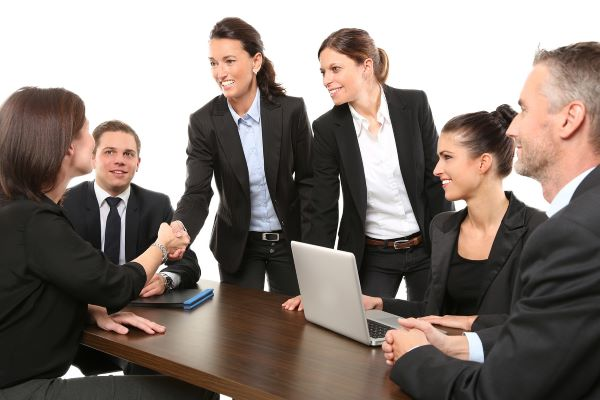

# **Dataset Overview**

The dataset is a comprehensive collection of employee records aimed at understanding factors influencing employee retention within a company. It contains 4,653 records, each providing detailed information about individual employees across various dimensions. The primary focus of this dataset is to predict whether an employee will leave the company or not, which is captured in the target column 'LeaveOrNot'.

**The columns in the dataset are as follows :**

1. Education: The highest educational qualification of the employee, such as Bachelors or Masters.

2. JoiningYear: The year the employee joined the company, which helps in determining their tenure.

3. City: The city where the employee is based, with entries like Bangalore, Pune, and New Delhi.

4. PaymentTier: The payment tier of the employee, an integer value indicating their salary level.

5. Age: The age of the employee, providing demographic insight.

6. Gender: The gender of the employee, classified as Male or Female.

7. EverBenched: A binary indicator (Yes/No) showing whether the employee has ever been benched, i.e., not assigned to any project.

8. ExperienceInCurrentDomain: The number of years the employee has worked in their current domain.
9. LeaveOrNot: The target column, where 1 indicates that the employee has left the company, and 0 indicates they have not.


# Importing Python libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score
import warnings

In [ ]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **Let's examine the dataframe in detail**

In [ ]:
df.shape

(4653, 9)

In [ ]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [ ]:
for i in df:
   if df[i].dtype in ['int64','object']:
    print(i,'|',df[i].unique())

Education | ['Bachelors' 'Masters' 'PHD']
JoiningYear | [2017 2013 2014 2016 2015 2012 2018]
City | ['Bangalore' 'Pune' 'New Delhi']
PaymentTier | [3 1 2]
Age | [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender | ['Male' 'Female']
EverBenched | ['No' 'Yes']
ExperienceInCurrentDomain | [0 3 2 5 1 4 7 6]
LeaveOrNot | [0 1]


# Data Preprocessing

Check missing values

In [ ]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Check duplicate values

In [ ]:
df.duplicated().sum()

1889

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2764, 9)

In [ ]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

# Visualization

PAIR PLOT

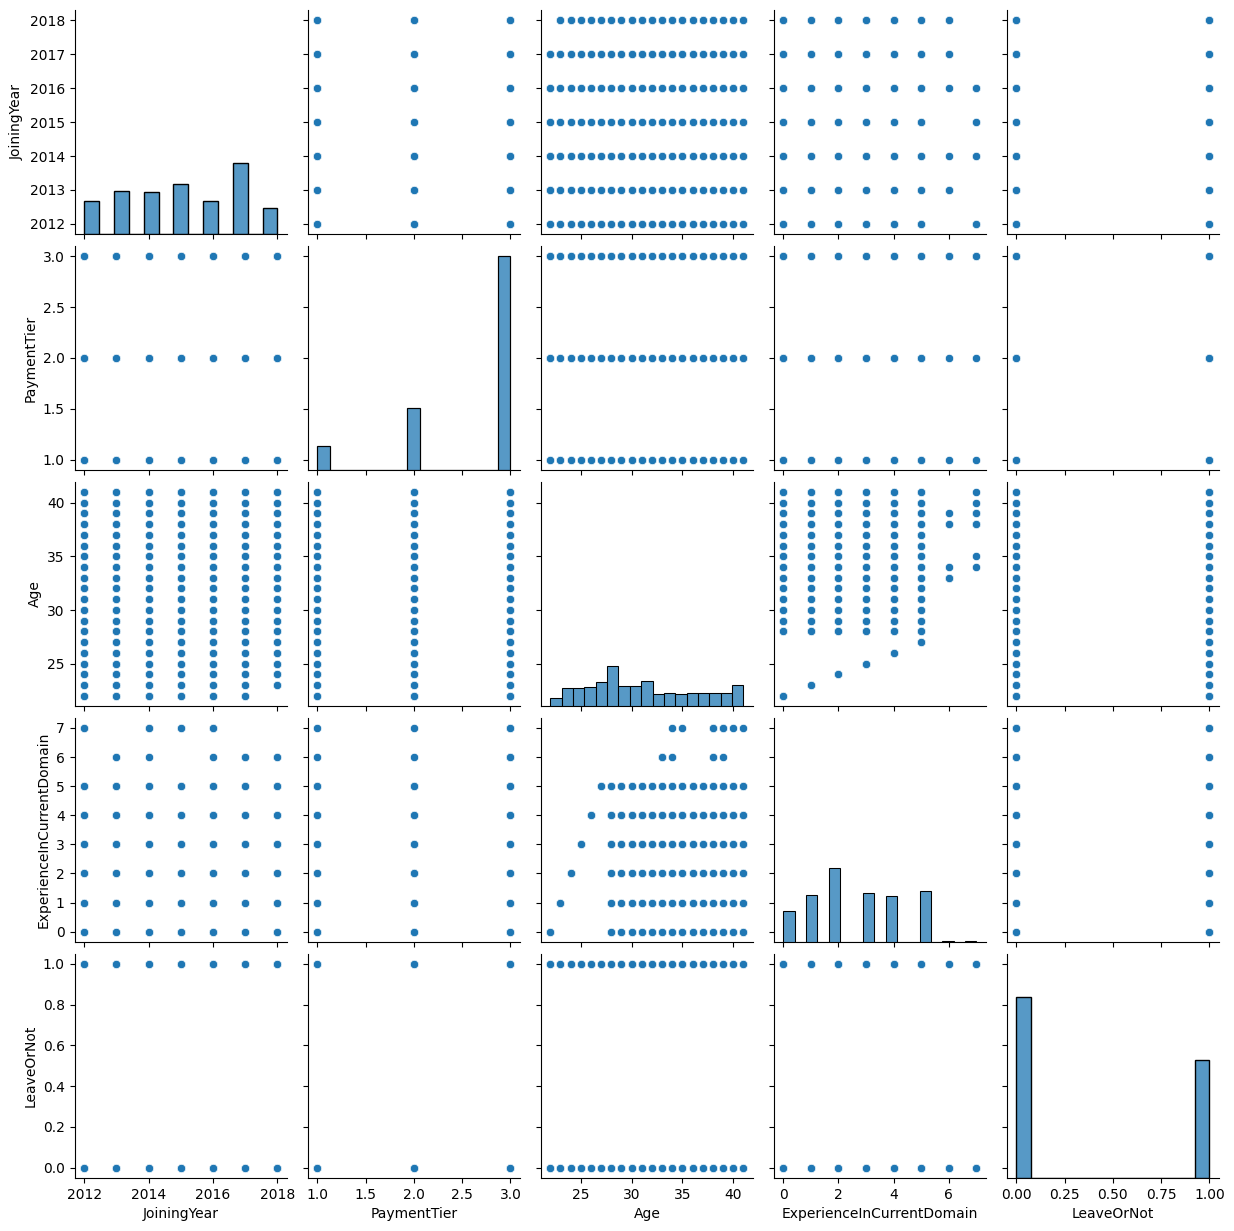

In [ ]:
sns.pairplot(df)

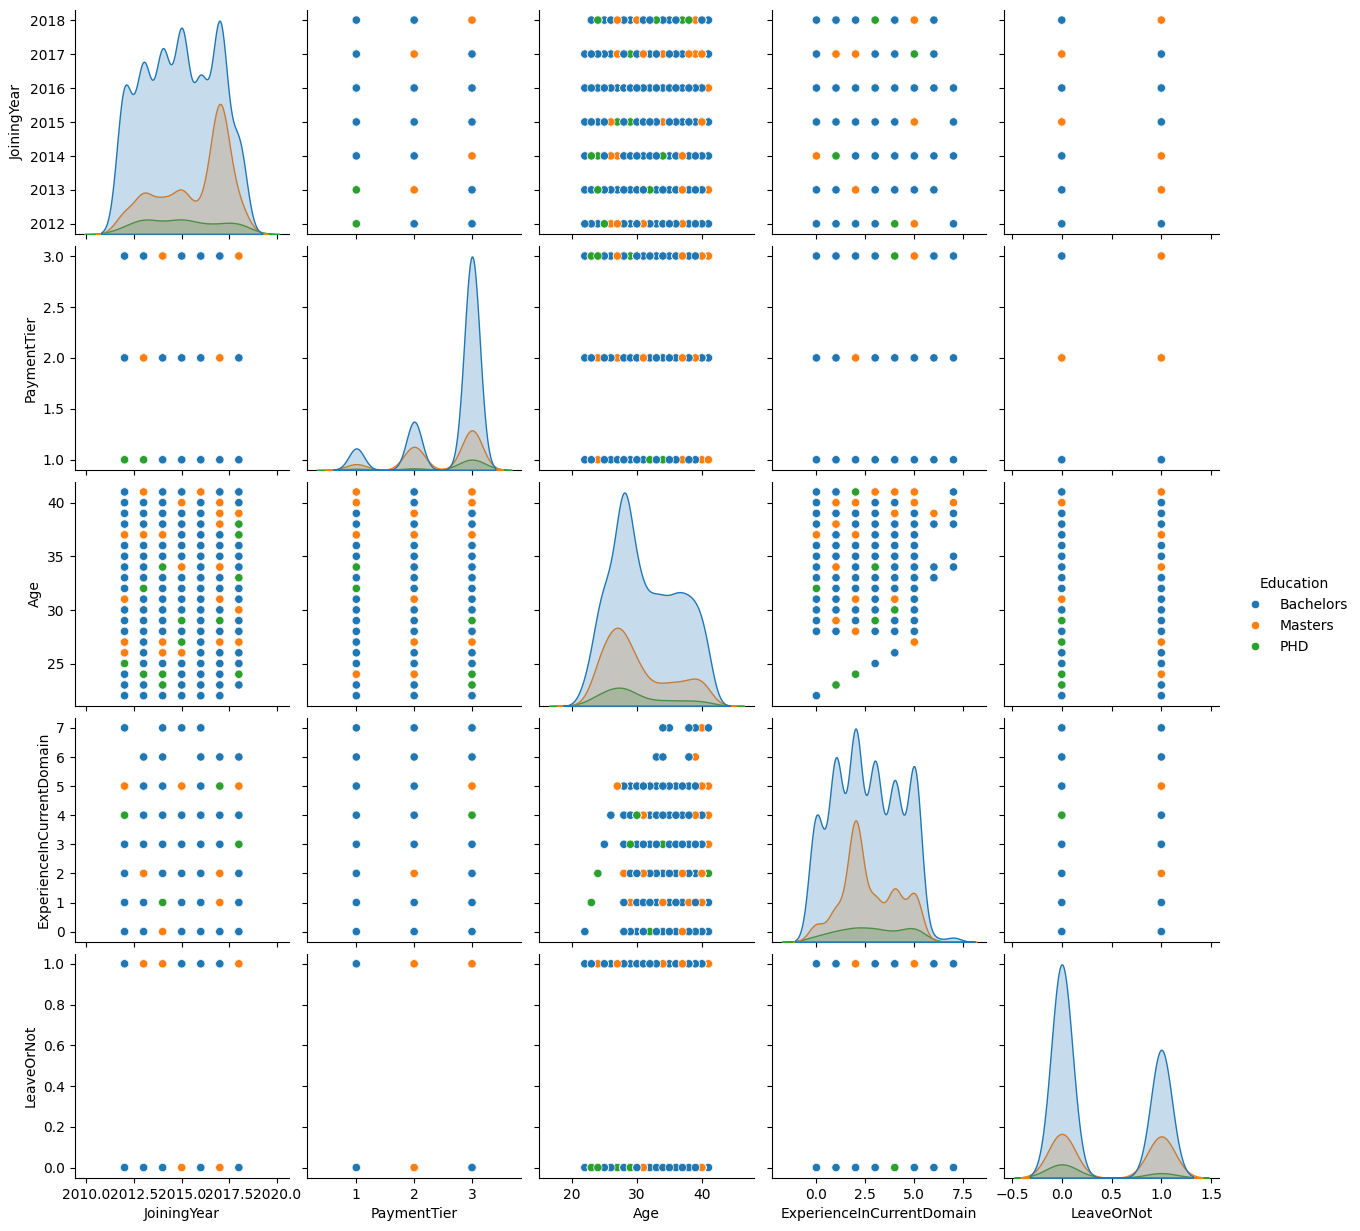

In [ ]:
sns.pairplot(df,hue='Education',kind='scatter')
plt.show()

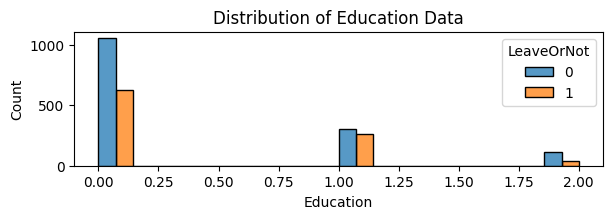

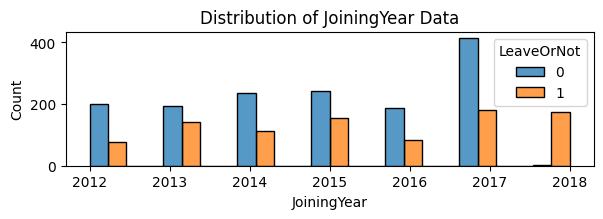

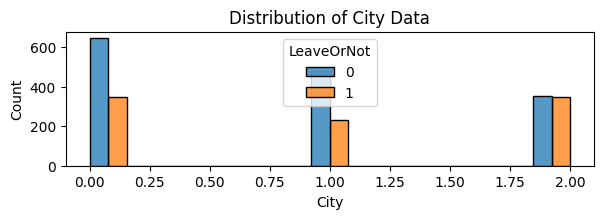

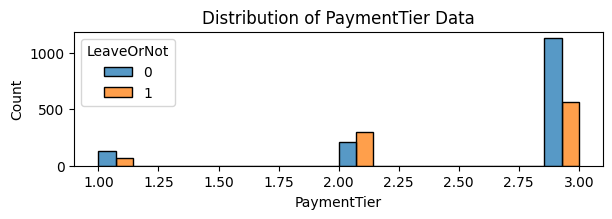

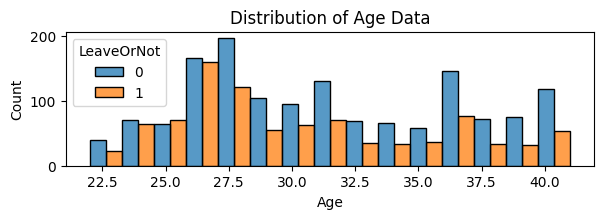

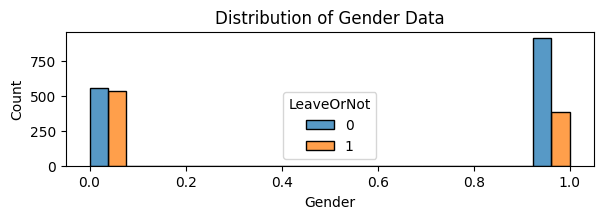

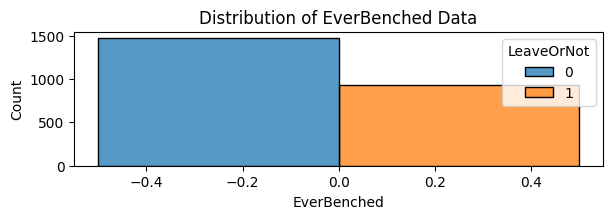

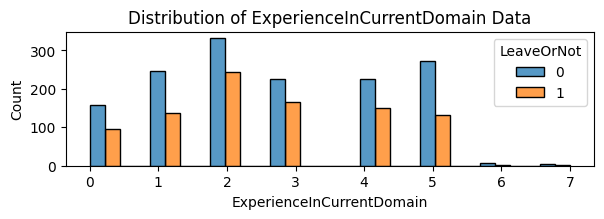

In [ ]:
lst=['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
for i in lst:
  plt.figure(figsize = (15, 8))
  plt.subplot(4,2,8)
  sns.histplot(data=df,x = df[i], hue = df["LeaveOrNot"], multiple = "dodge")
  plt.title(f"Distribution of {i} Data")
  plt.show()

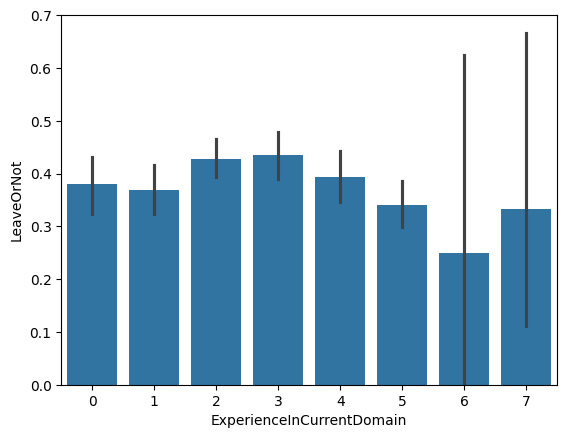

In [ ]:
sns.barplot(x = 'ExperienceInCurrentDomain', y = 'LeaveOrNot', data = df)
plt.show()

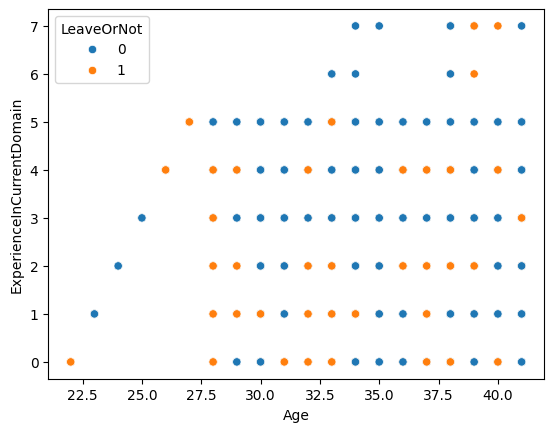

In [ ]:
sns.scatterplot(data=df, x="Age", y="ExperienceInCurrentDomain",hue='LeaveOrNot')
plt.show()

DISTRIBUTION PLOT

<Axes: xlabel='City', ylabel='Count'>

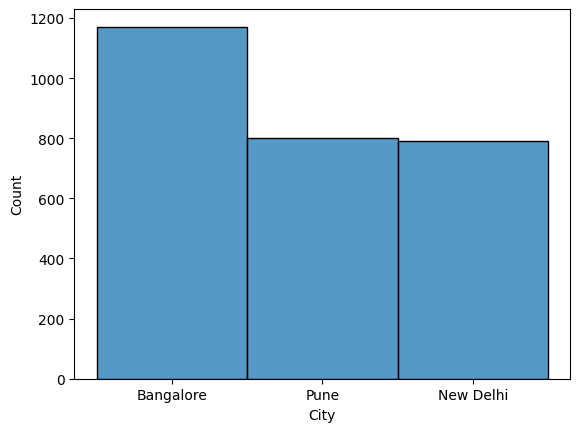

In [ ]:
sns.histplot(df['City'])

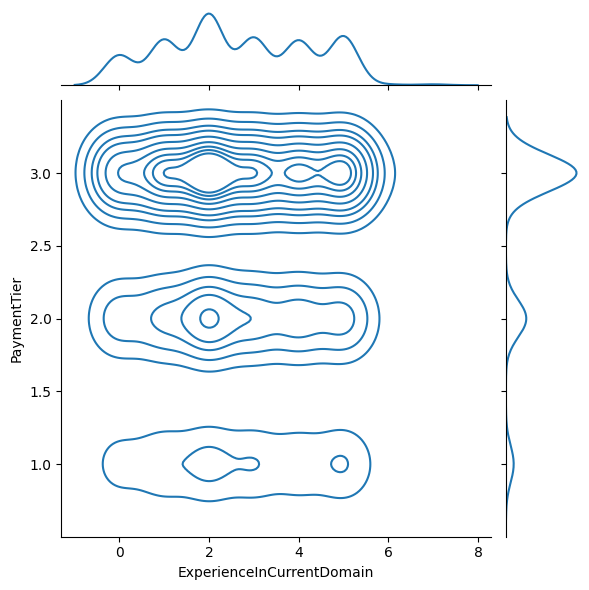

In [ ]:
sns.jointplot(x='ExperienceInCurrentDomain',y='PaymentTier',data=df,kind='kde')

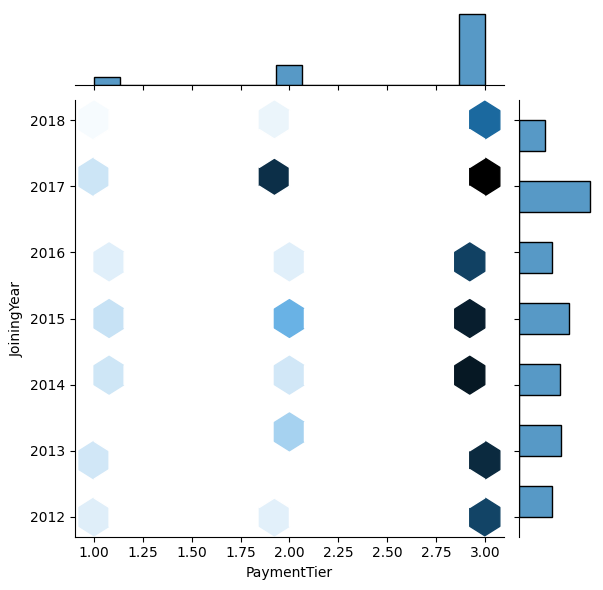

In [ ]:
sns.jointplot(x='PaymentTier',y='JoiningYear',data=df,kind='hex')

In [ ]:
df.corr(numeric_only=True)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000


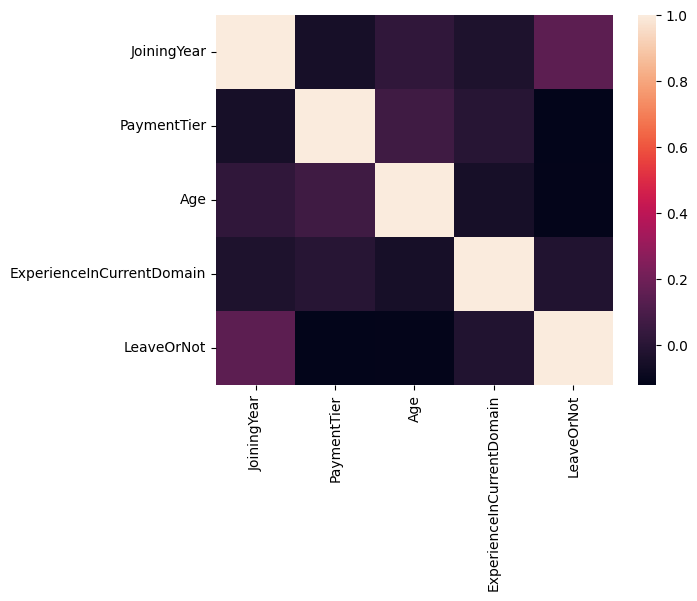

In [ ]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

# Label Encoding

In [ ]:
lst=['Education','City','Gender','EverBenched']
le_enco={}
for col in lst:
  le_enco[col]=LabelEncoder()
  df[col]=le_enco[col].fit_transform(df[col])
le_enco

{'Education': LabelEncoder(),
 'City': LabelEncoder(),
 'Gender': LabelEncoder(),
 'EverBenched': LabelEncoder()}

In [ ]:
df.dtypes

Education                    int64
JoiningYear                  int64
City                         int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

# Removing Outliers

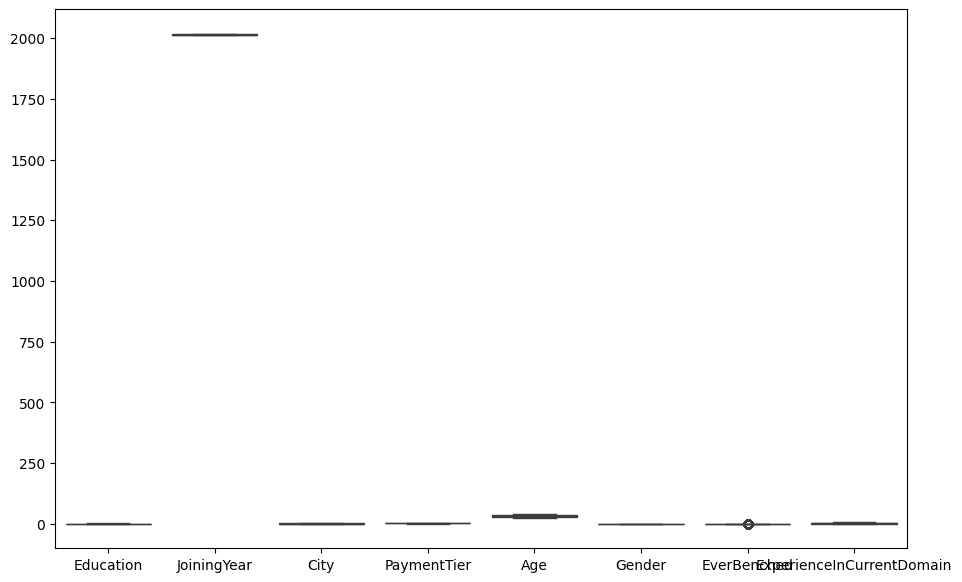

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(data=df[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']])
plt.show()

In [ ]:
lst=['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
for i in lst:
  if df[i].dtype in ['int64']:
     Q1 = df[i].quantile(0.25)
     Q3 = df[i].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.shape

(2403, 9)

# Seperating Features and Target

In [ ]:
x=df.drop(columns='LeaveOrNot')
y=df.LeaveOrNot

In [ ]:
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    1474
1     929
Name: count, dtype: int64

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Creation

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
naive=MultinomialNB()
decision=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()

In [ ]:
model1=[knn,svc,naive,decision,rf,gbc,xgb,ada]
for model in model1:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('Accuracy_Score:',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('------------------------------------------------------------------')

KNeighborsClassifier()
Accuracy_Score: 67.96116504854369
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       456
           1       0.58      0.48      0.53       265

    accuracy                           0.68       721
   macro avg       0.65      0.64      0.64       721
weighted avg       0.67      0.68      0.67       721

------------------------------------------------------------------
SVC()
Accuracy_Score: 63.24549237170597
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       456
           1       0.00      0.00      0.00       265

    accuracy                           0.63       721
   macro avg       0.32      0.50      0.39       721
weighted avg       0.40      0.63      0.49       721

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 66.7128987517337
              precision    recall  f1-score   support

           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DecisionTreeClassifier()
Accuracy_Score: 64.77115117891817
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       456
           1       0.52      0.58      0.55       265

    accuracy                           0.65       721
   macro avg       0.63      0.63      0.63       721
weighted avg       0.66      0.65      0.65       721

------------------------------------------------------------------
RandomForestClassifier(random_state=1)
Accuracy_Score: 71.70596393897365
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       456
           1       0.62      0.62      0.62       265

    accuracy                           0.72       721
   macro avg       0.70      0.70      0.70       721
weighted avg       0.72      0.72      0.72       721

------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy_Score: 77.80859916782246
              pre

In [ ]:
gs=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=10)
gs.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [ ]:
gs.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [ ]:
gs.best_score_

0.6646144536652834

In [ ]:
# gs1=GridSearchCV(SVC(),{'kernel':['linear','poly','rbf'],'C':[i for i in range(100)]},cv=5)
# gs1.fit(x_scaled,y)

In [ ]:
#gs1.best_params_

In [ ]:
#gs1.best_score_

In [ ]:
dt=GridSearchCV(DecisionTreeClassifier(),{'criterion':['entropy','gini'],'max_depth':[i for i in range(20)],'min_samples_split':[i for i in range(20)]},cv=5)
dt.fit(x,y)

In [ ]:
dt.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 19}

In [ ]:
dt.best_score_

0.7761287248787249

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=7,metric='euclidean',weights='uniform')
svc1=SVC(kernel='rbf',C=4)
naive1=MultinomialNB()
decision1=DecisionTreeClassifier(criterion='entropy', max_depth=7,min_samples_split=19)
rf1=RandomForestClassifier()
gcv1=GradientBoostingClassifier()
xgb1=XGBClassifier()
ada1=AdaBoostClassifier()

In [ ]:
model2=[knn1,svc1,naive1,decision1,rf1,gcv1,xgb1,ada1]
for model in model2:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('Accuracy_Score:',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('------------------------------------------------------------------')

KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Accuracy_Score: 68.37725381414702
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       456
           1       0.59      0.45      0.51       265

    accuracy                           0.68       721
   macro avg       0.66      0.64      0.64       721
weighted avg       0.67      0.68      0.67       721

------------------------------------------------------------------
SVC(C=4)
Accuracy_Score: 63.24549237170597
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       456
           1       0.00      0.00      0.00       265

    accuracy                           0.63       721
   macro avg       0.32      0.50      0.39       721
weighted avg       0.40      0.63      0.49       721

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 66.7128987517337
              precision    rec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier()
Accuracy_Score: 71.28987517337032
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       456
           1       0.61      0.62      0.61       265

    accuracy                           0.71       721
   macro avg       0.69      0.69      0.69       721
weighted avg       0.71      0.71      0.71       721

------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy_Score: 77.80859916782246
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       456
           1       0.79      0.54      0.64       265

    accuracy                           0.78       721
   macro avg       0.78      0.73      0.74       721
weighted avg       0.78      0.78      0.77       721

------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylev

# Handling imbalanced data using SMOTE

In [ ]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [ ]:
y_resampled.value_counts()

LeaveOrNot
0    1474
1    1474
Name: count, dtype: int64

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
knns=KNeighborsClassifier()
svcs=SVC()
naives=MultinomialNB()
decisions=DecisionTreeClassifier()
rfs=RandomForestClassifier(random_state=1)
gbs=GradientBoostingClassifier()
xgbs=XGBClassifier()
adas=AdaBoostClassifier()

In [ ]:
model3=[knns,svcs,naives,decisions,rfs,gbs,xgbs,adas]
for model in model3:
  model.fit(x_train1,y_train1)
  y_pred=model.predict(x_test1)
  print(model)
  print('Accuracy_Score:',accuracy_score(y_test1,y_pred)*100)
  print(classification_report(y_test1,y_pred))
  print('------------------------------------------------------------------')

KNeighborsClassifier()
Accuracy_Score: 66.55367231638418
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       449
           1       0.65      0.70      0.67       436

    accuracy                           0.67       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.67      0.67      0.67       885

------------------------------------------------------------------
SVC()
Accuracy_Score: 49.26553672316384
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       449
           1       0.49      1.00      0.66       436

    accuracy                           0.49       885
   macro avg       0.25      0.50      0.33       885
weighted avg       0.24      0.49      0.33       885

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 62.03389830508475
              precision    recall  f1-score   support

          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(random_state=1)
Accuracy_Score: 72.20338983050848
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       449
           1       0.72      0.72      0.72       436

    accuracy                           0.72       885
   macro avg       0.72      0.72      0.72       885
weighted avg       0.72      0.72      0.72       885

------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy_Score: 74.91525423728814
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       449
           1       0.79      0.67      0.73       436

    accuracy                           0.75       885
   macro avg       0.75      0.75      0.75       885
weighted avg       0.75      0.75      0.75       885

------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              c

In [ ]:
gsk=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=10)
gsk.fit(x_resampled,y_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [ ]:
gsk.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
gsk.best_score_

0.6727130174103539

In [ ]:
# gss=GridSearchCV(SVC(),{'kernel':['linear','poly','rbf'],'C':[i for i in range(100)]},cv=5)
# gss.fit(x_over_scaled,y_over)

In [ ]:
#gss.best_params_

In [ ]:
#gss.best_score_

In [ ]:
params={'criterion':['entropy','gini'],
        'max_depth':[5,10,30,40,50],
       'min_samples_split':[10,20,25,30,45,60,100] }
rs=RandomizedSearchCV(DecisionTreeClassifier(),params,cv=10,n_iter=15)
rs.fit(x_train1,y_train1)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 30, 40, 50],
                                        'min_samples_split': [10, 20, 25, 30,
                                                              45, 60, 100]})

In [ ]:
rs.best_params_

{'min_samples_split': 60, 'max_depth': 50, 'criterion': 'gini'}

In [ ]:
rs.best_score_

0.7430795928896393

In [ ]:
knn_s=KNeighborsClassifier(n_neighbors=3,metric='euclidean',weights='uniform')
svc_s=SVC(kernel='rbf',C=4)
naive_s=MultinomialNB()
decision_s=DecisionTreeClassifier(criterion='gini',max_depth=50,min_samples_split=60)
rf_s=RandomForestClassifier()
gcv_s=GradientBoostingClassifier()
xgb_s=XGBClassifier()
ada_s=AdaBoostClassifier()

In [ ]:
model4=[knn_s,svc_s,naive_s,decision_s,rf_s,gcv_s,xgb_s,ada_s]
for model in model4:
  model.fit(x_train1,y_train1)
  y_pred=model.predict(x_test1)
  print(model)
  print('Accuracy_Score:',accuracy_score(y_test1,y_pred)*100)
  print(classification_report(y_test1,y_pred))
  print('------------------------------------------------------------------')

KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Accuracy_Score: 64.7457627118644
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       449
           1       0.63      0.69      0.66       436

    accuracy                           0.65       885
   macro avg       0.65      0.65      0.65       885
weighted avg       0.65      0.65      0.65       885

------------------------------------------------------------------
SVC(C=4)
Accuracy_Score: 49.26553672316384
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       449
           1       0.49      1.00      0.66       436

    accuracy                           0.49       885
   macro avg       0.25      0.50      0.33       885
weighted avg       0.24      0.49      0.33       885

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 62.03389830508475
              precision    rec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier()
Accuracy_Score: 71.9774011299435
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       449
           1       0.72      0.72      0.72       436

    accuracy                           0.72       885
   macro avg       0.72      0.72      0.72       885
weighted avg       0.72      0.72      0.72       885

------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy_Score: 74.91525423728814
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       449
           1       0.79      0.67      0.73       436

    accuracy                           0.75       885
   macro avg       0.75      0.75      0.75       885
weighted avg       0.75      0.75      0.75       885

------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_byleve

In [ ]:
needed_files={'label_encoder':le_enco,'model':decision1}
import  pickle
file=open('file.pkl','wb')
#pickle.dump(file=file,obj=needed_files)
pickle.dump(needed_files,file)

In [ ]:
file1=open('file.pkl','rb')
res=pickle.load(file1)
res['model']

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=16)